# GPT-2

In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Sample examples with explanations, predictions and scores

In [19]:
data_save_dir = "/cluster/home/kamara/syntax-shap/data"
batch_size = 64

dataset = "generics"
model_name = "gpt2"
threshold_ = 0.5
seed_ = 0


#filter_ids_path = os.path.join(data_save_dir, f"{dataset}")
#with open(os.path.join(filter_ids_path, f"{dataset}_{model_name}_stats.pkl"), "rb") as f:
    #stats = pickle.load(f)

#print("Size of the dataset:", stats["n_data"])
#print("Size of filtered dataset:", stats["n_filtered"])
#print("Maximum number of batches:", stats["n_filtered"]//batch_size)

In [20]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results/explanations/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-4]
            model_name = parts[-3]
            algorithm = parts[-2]
            seed = parts[-1].split('.pkl')[0]  # Removes the file extension
           
            if eval(seed) == seed_:
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)
                df['explanation'] = df['explanation'].apply(lambda x: x.reshape(-1))

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_explanation = pd.concat(df_list, ignore_index=True)
df_explanation


,input_id,input,tokens,token_ids,explanation,algorithm,n_token
0,4726,"Pinecone fishes are popular in aquariums, but ...","[P, ine, cone, fishes, are, popular, in, ...","[47, 500, 49180, 49765, 389, 2968, 287, 33868,...","[174843.0, -198843.0, 104070.0, -49896.0, 1592...",partition,14
1,2068,Baby blue is known as one of the pastel,"[Baby, blue, is, known, as, one, of, th...","[36534, 4171, 318, 1900, 355, 530, 286, 262, 1...","[-25547.0, -3317.0, 22270.0, 7842.0, 6239.0, -...",partition,9
2,4966,Transpiration also cools plants and enables th...,"[Trans, piration, also, cool, s, plants, a...","[8291, 10514, 635, 3608, 82, 6134, 290, 13536,...","[-20158.0, 936.0, 12711.0, -133934.0, -23456.0...",partition,14
3,2098,"Cuttlefish eat small molluscs, crabs, shrimp, ...","[Cut, tle, fish, eat, small, m, oll, us, cs...","[26254, 7100, 11084, 4483, 1402, 285, 692, 385...","[12931.0, 88627.0, 42099.0, 19786.0, -11756.0,...",partition,9
4,1186,Libertarians believe that property rights come...,"[Liber, tarians, believe, that, property, ...","[31199, 28266, 1975, 326, 3119, 2489, 1282, 422]","[7185.0, 5499.0, -13883.0, -20589.0, 4595.0, 2...",partition,7
...,...,...,...,...,...,...,...
45325,1240,Many streets bear the names of epic,"[Many, streets, bear, the, names, of, epic]","[7085, 6483, 6842, 262, 3891, 286, 12191]","[0.015233590960541001, 0.014353427927265298, 0...",syntax,7
45326,3162,Some printing presses use lead type because it...,"[Some, printing, presses, use, lead, type...","[4366, 13570, 31048, 779, 1085, 2099, 780, 340...","[0.10320363555393271, 0.08583253001660626, 0.0...",syntax,11
45327,486,Protectionism is one of the,"[Prot, ection, ism, is, one, of, the]","[19703, 3213, 1042, 318, 530, 286, 262]","[0.6132685618814141, 0.003298306736866629, 0.0...",syntax,5
45328,4007,Judges give points both for length of the jump...,"[Jud, ges, give, points, both, for, lengt...","[26141, 3212, 1577, 2173, 1111, 329, 4129, 286...","[0.025477164882549787, 0.10109235913767227, 0....",syntax,13


In [21]:
#### Select rows which input_ids are in the list of input_ids of the rows with algorithm = 'shap'

# Extract input_id values where algorithm is 'shap'
shap_input_ids = df_explanation[df_explanation['algorithm'] == 'shap']['input_id'].unique()

# Filter the DataFrame to keep rows where input_id is in shap_input_ids
filtered_df_explanation = df_explanation[df_explanation['input_id'].isin(shap_input_ids)]
filtered_df_explanation

,input_id,input,tokens,token_ids,explanation,algorithm,n_token
1,2068,Baby blue is known as one of the pastel,"[Baby, blue, is, known, as, one, of, th...","[36534, 4171, 318, 1900, 355, 530, 286, 262, 1...","[-25547.0, -3317.0, 22270.0, 7842.0, 6239.0, -...",partition,9
4,1186,Libertarians believe that property rights come...,"[Liber, tarians, believe, that, property, ...","[31199, 28266, 1975, 326, 3119, 2489, 1282, 422]","[7185.0, 5499.0, -13883.0, -20589.0, 4595.0, 2...",partition,7
5,2963,Coriander is originally from the southwestern ...,"[C, ori, ander, is, originally, from, the,...","[34, 10145, 4066, 318, 6198, 422, 262, 46065, ...","[58649.0, -35015.0, 827.0, -122788.0, 93150.0,...",partition,10
6,4038,Mountains are close to the coast so that most ...,"[Mount, ains, are, close, to, the, coast,...","[35452, 1299, 389, 1969, 284, 262, 7051, 523, ...","[57323.0, -52021.0, 14657.0, -1743.0, -23911.0...",partition,13
9,2186,Organometallic chemistry combines aspects of i...,"[Organ, omet, allic, chemistry, combines, a...","[26121, 908, 18196, 16585, 21001, 7612, 286, 2...","[49458.0, 50220.0, -49725.0, -82294.0, -12338....",partition,9
...,...,...,...,...,...,...,...
45325,1240,Many streets bear the names of epic,"[Many, streets, bear, the, names, of, epic]","[7085, 6483, 6842, 262, 3891, 286, 12191]","[0.015233590960541001, 0.014353427927265298, 0...",syntax,7
45326,3162,Some printing presses use lead type because it...,"[Some, printing, presses, use, lead, type...","[4366, 13570, 31048, 779, 1085, 2099, 780, 340...","[0.10320363555393271, 0.08583253001660626, 0.0...",syntax,11
45327,486,Protectionism is one of the,"[Prot, ection, ism, is, one, of, the]","[19703, 3213, 1042, 318, 530, 286, 262]","[0.6132685618814141, 0.003298306736866629, 0.0...",syntax,5
45328,4007,Judges give points both for length of the jump...,"[Jud, ges, give, points, both, for, lengt...","[26141, 3212, 1577, 2173, 1111, 329, 4129, 286...","[0.025477164882549787, 0.10109235913767227, 0....",syntax,13


In [22]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(threshold) == threshold_) and (eval(seed) == seed_):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final_single_threshold = pd.concat(df_list, ignore_index=True)
df_final_single_threshold


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,algorithm,n_token
0,0.011585,0.027488,0.043898,-0.983949,0.1,0.693488,1086,Every organ has a reason to be,partition,7
1,0.004144,0.004144,0.004144,-8.329556,0.0,0.732332,1346,Players participate in part due to fan,partition,7
2,0.011442,0.011442,0.011442,-9.345150,0.1,0.366218,1217,Family means nobody gets left behind or,partition,7
3,-0.294123,0.050958,0.122152,-0.539848,0.3,0.395801,3706,Carbonyls are found in many natural substances...,partition,12
4,0.356914,0.341516,0.356914,-3.143234,0.3,0.455170,2312,People say immunization to mean the same thing as,partition,9
...,...,...,...,...,...,...,...,...,...,...
23045,0.761992,0.755714,0.604026,-4.798661,0.2,0.654122,4733,Many students choose a faculty committee whose...,syntax,14
23046,0.025352,0.025352,0.025352,-10.140658,0.0,0.736924,4747,Color codes are often difficult or impossible ...,syntax,14
23047,0.233642,0.229481,0.233642,-4.027753,0.1,0.617067,897,Word order is the other big,syntax,6
23048,0.588854,0.583097,0.588854,-4.627626,0.2,0.679127,3409,Instrumental conditioning is based off of a sy...,syntax,11


In [24]:
sample = pd.merge(filtered_df_explanation, df_final_single_threshold, on=['input', 'input_id', 'algorithm', 'n_token'])
df_str = pd.read_csv(f"/cluster/home/kamara/syntax-shap/data/{dataset}/seed_{seed}/{dataset}_{model_name}_{seed}_predictions.csv")
sample_with_y = pd.merge(sample, df_str, on=['input', 'input_id'])
#sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

In [21]:
sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

### N_tokens vs performance

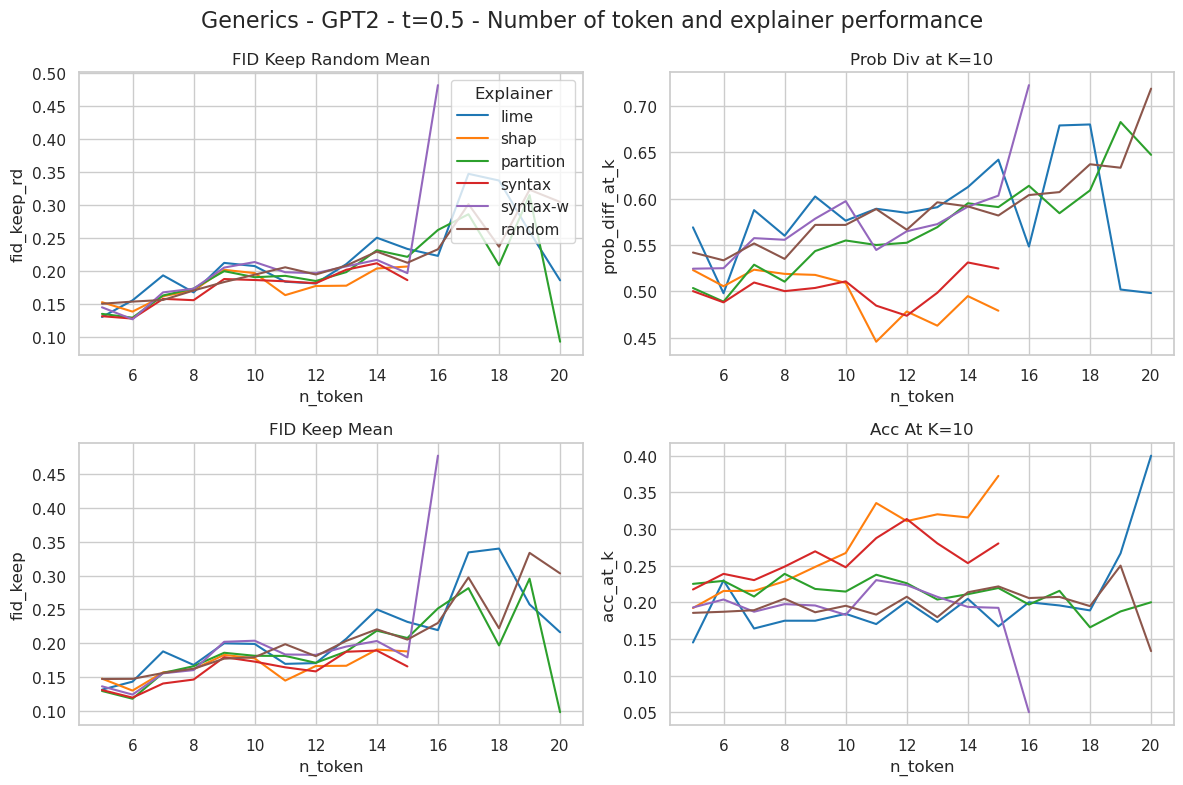

In [25]:
df = df_final_single_threshold.groupby(['algorithm', 'n_token']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w", "random"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Explainer', loc='upper right')

fig.suptitle('Generics - GPT2 - t=0.5 - Number of token and explainer performance', fontsize=16)

plt.tight_layout()
plt.show()

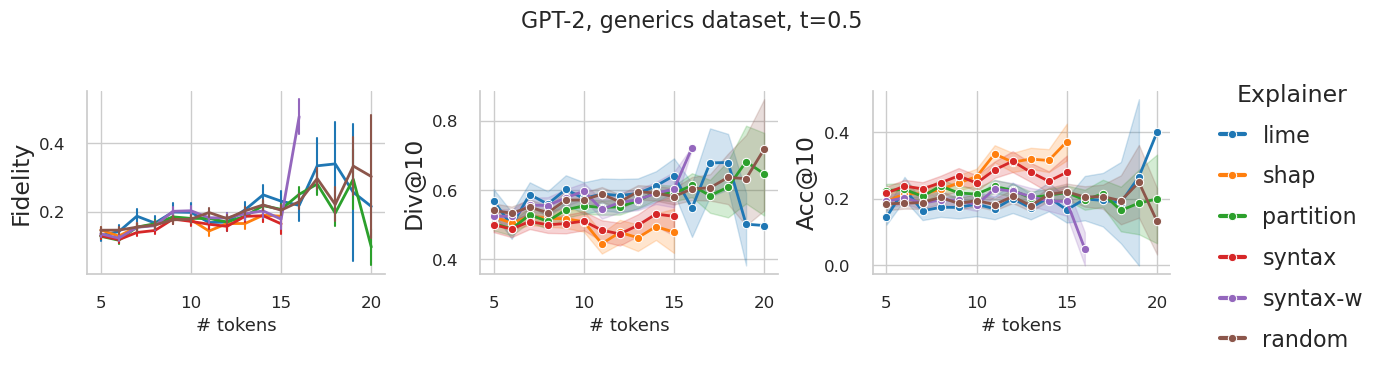

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final_single_threshold#.groupby(['algorithm']).reset_index()#.mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w", "random"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)


fig, axes = plt.subplots(1, 3, figsize=(14,3.5))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=palette, linewidth=2, errorbar='se', err_style='bars')
axes[0].set_title('')
axes[0].set_xlabel('# tokens', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=palette, linewidth=2, markers=True, marker='o')
axes[1].set_title('')
axes[1].set_xlabel('# tokens', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=palette, linewidth=2, markers=True, marker='o')
axes[2].set_title('')
axes[2].set_xlabel('# tokens', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
legend = axes[2].legend(title='Explainer', loc='upper left', bbox_to_anchor=(1.1, 1.15), fontsize=16, frameon=False, handlelength=1.1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(3)  # Increase line width in legend

fig.suptitle(f'GPT-2, {dataset} dataset, t={threshold_}', fontsize=16)  # Adjust suptitle position

sns.despine()
plt.tight_layout()
plt.show()

#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/n_token_vs_perf_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)


### Performance at Thresholds

In [27]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)

                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)
                df['threshold'] = eval(threshold)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,algorithm,n_token,threshold
0,0.041892,0.041892,0.041892,-10.642878,0.0,0.521303,5253,Authorities differ in what they consider a phy...,partition,15,0.2
1,0.037074,0.037074,0.025061,-10.520692,0.0,0.883084,3256,"Locusts are edible insects, and are considered...",partition,11,0.2
2,0.043866,0.043866,-0.017188,-10.688929,0.2,0.495584,3553,True toads have poison parotoid glands that ca...,partition,12,0.2
3,0.015911,0.015911,0.005548,-9.674852,0.0,0.482684,1965,Complications are problems that happen because...,partition,8,0.2
4,0.234806,0.125850,0.234806,-0.767813,0.3,0.371443,2777,Many people use butter even in their foods ins...,partition,10,0.2
...,...,...,...,...,...,...,...,...,...,...,...
206709,0.028812,0.035999,0.035999,-10.491285,0.1,0.733051,2575,Giant pandas are about the size of an American...,syntax,10,0.6
206710,0.757374,0.681907,0.760451,-2.270240,0.5,0.203355,5336,Any user can nom articles for deletion as long...,syntax,15,0.6
206711,-0.006853,0.001946,0.001946,-7.574027,0.2,0.783417,4832,Winter cover crops such as oats or rye have lo...,syntax,14,0.6
206712,0.216566,0.216566,-0.157810,-12.285657,0.0,0.844654,914,Visibility can be poor on foggy,syntax,6,0.6


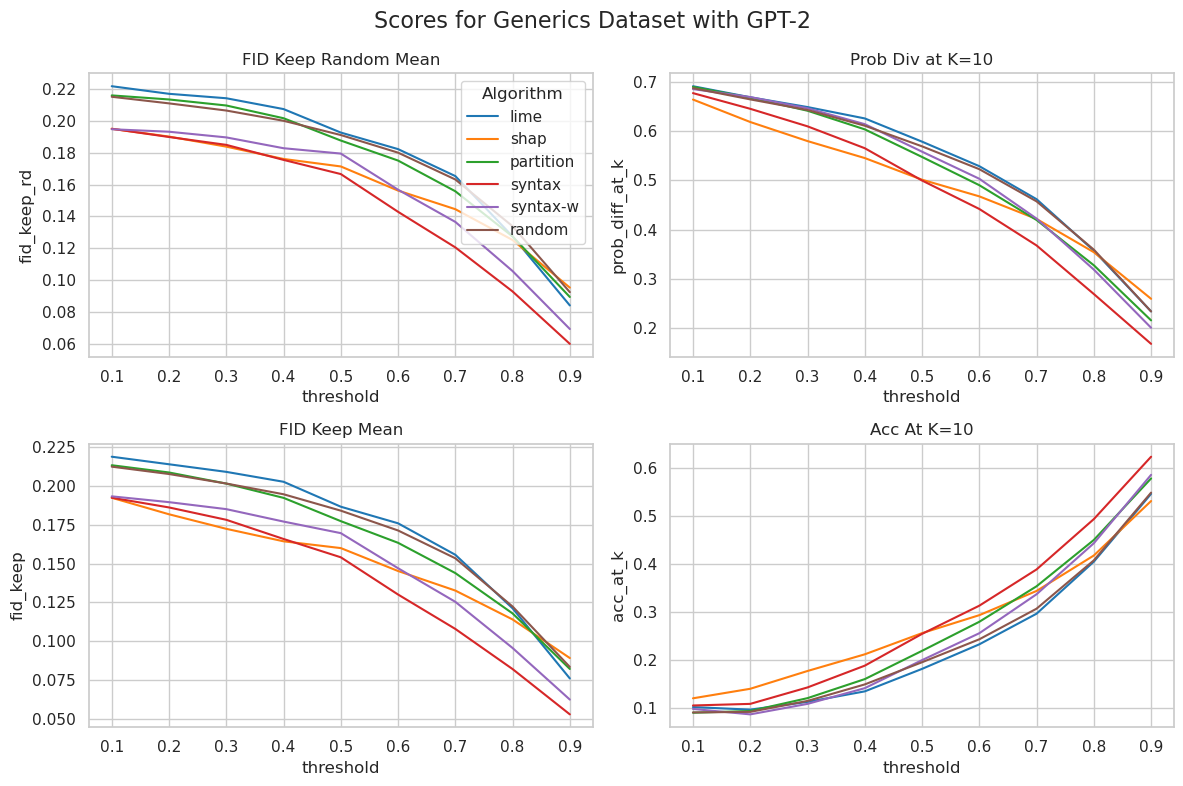

In [28]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()
# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w", "random"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Algorithm', loc='upper right')

fig.suptitle('Scores for Generics Dataset with GPT-2', fontsize=16)

plt.tight_layout()
plt.show()


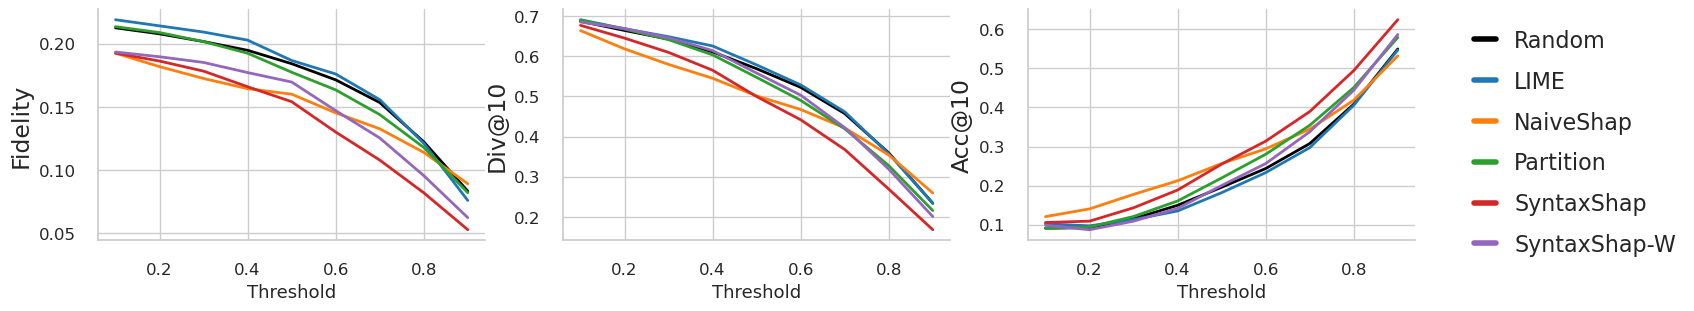

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "shap", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'shap': 'NaiveShap', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4]}   

legend_order = ["Random", "LIME", "NaiveShap", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 3, figsize=(17,3))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('Threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('Threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=dict_color, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('Threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[2].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[2].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend


#fig.suptitle(f'GPT-2, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)


In [30]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results/scores/{model_name}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_) and (eval(threshold) == threshold_):# and (dataset != 'negation'):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                print(df.head())
                print(df.columns)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['tokens'].apply(len)
                df['threshold'] = eval(threshold)
                df['dataset'] = dataset

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


   fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  prob_diff_at_k  \
0     0.060216  0.217556  0.398283      -0.709063       0.6        0.160110   
1     0.004055  0.004055  0.004055      -8.307833       0.5        0.110889   
2     0.037616  0.031742  0.037616      -1.856826       0.4        0.257294   
3    -0.019572  0.006036  0.006036      -8.705629       0.4        0.422216   
4     0.457057  0.457057  0.457057     -13.032567       0.0        0.726081   

   input_id                       input  
0       172         A bat flies without  
1       464      A dolphin sees without  
2       196      A monkey walks without  
3       414  Peter is a groom without a  
4       530             A person has no  
Index(['fid_keep_rd', 'fid_keep', 'fid_rmv', 'log_odds_keep', 'acc_at_k',
       'prob_diff_at_k', 'input_id', 'input'],
      dtype='object')


KeyError: 'tokens'

0          7
1          9
2         16
3         19
4         20
        ... 
1429    5754
1430    5757
1431    5759
1432    5760
1433    5774
Name: input_id, Length: 1434, dtype: int64


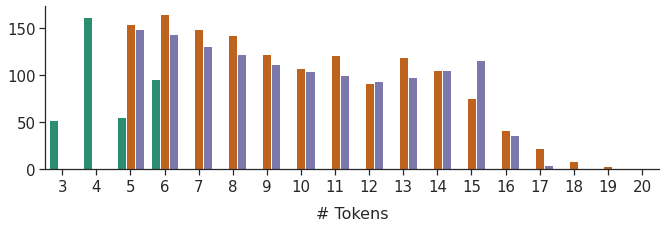

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_final[['input_id', 'input', 'n_token', 'dataset']]
df = df.groupby(['dataset', 'input_id']).mean().reset_index()
df['n_token'] = df['n_token'].apply(lambda x: int(x))
print(df[df['dataset'] == 'generics']['input_id'])
order = ['negation', 'generics', 'rocstories']
df = df.sort_values(by='dataset', key=lambda x: x.map({v: i for i, v in enumerate(order)}))
df['dataset'] = df['dataset'].replace({'negation': 'Negation', 'generics': 'Generics', 'rocstories': 'ROCStories'})


# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Plotting
plt.figure(figsize=(11, 3))
sns.countplot(data=df, x='n_token', hue='dataset', palette=sns.color_palette("Dark2"), width=0.8, edgecolor='white')
plt.xlabel('# Tokens', fontsize=16, labelpad=12)
plt.ylabel(None)

#legend = ax.legend(title='Dataset', loc='upper left', bbox_to_anchor=(.8, 1.18), fontsize=15, frameon=False, handlelength=1, labelspacing=0.8)
#legend.get_title().set_fontsize('15')  # Increase legend title font size
#for line in legend.get_lines():
    #line.set_linewidth(4)  # Increase line width in legend

plt.legend([],[], frameon=False)
sns.despine()

plt.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_n_token_count_2_no_leg.pdf", bbox_inches='tight', dpi=600)

plt.show()


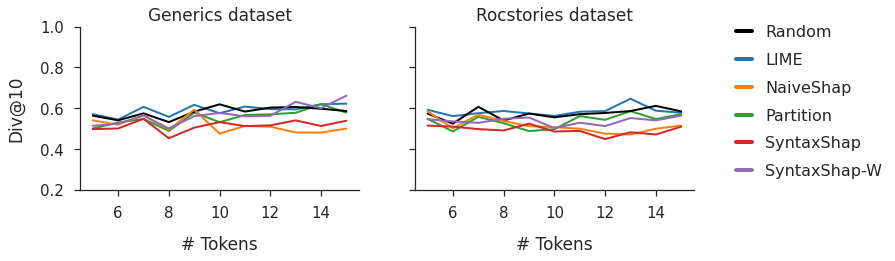

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'dataset', 'n_token']).mean().reset_index()
df = df[df['dataset'] != 'negation']
df = df[df['n_token'] <= 15]


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "shap", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'shap': 'NaiveShap', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4]}   

legend_order = ["Random", "LIME", "NaiveShap", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 2, figsize=(11,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})


# Creating a lineplot for each score
sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='generics'], ax=axes[0], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding
axes[0].set_ylim(0.2, 1)

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='rocstories'], ax=axes[1], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_n_tokens_vs_performance_15tokens_mean.pdf", bbox_inches='tight', dpi=600)
